In [ ]:
import requests
import pandas
import numpy as np
import matplotlib.pyplot as plt

url = "https://richardson.byu.edu/220/ds_salary.csv"
filename = "ds_salary.csv"

chart = pandas.read_csv(url)
chart.to_csv(filename)

display(chart)

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
576,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
577,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
578,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
579,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


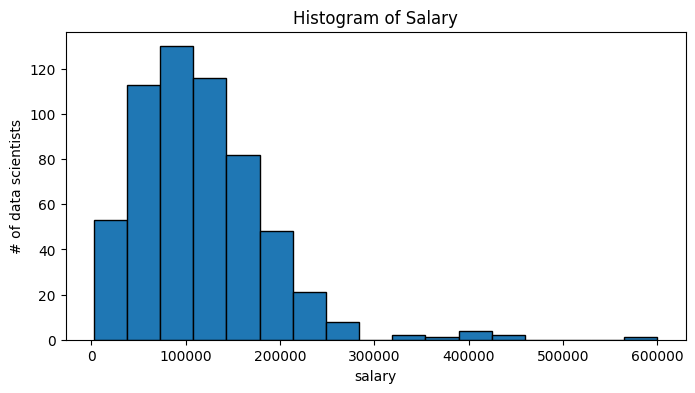

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(chart["salary_in_usd"], bins=17 , edgecolor='black')
plt.title(f'Histogram of Salary')
plt.xlabel("salary")
plt.ylabel('# of data scientists')
plt.show()

#**General Salary Data:**

Based off the histogram, the mean salary in USD for data scientists is around 115601. On average, each person's salary deviates from the mean around 70546 USD. The mediam salary between all sata scientists is 105000. The histogram is right skewed indicating that most data scientists will fall on the lower end of the pay range with few exceding the traditional salary.

In [ ]:
mean_value = np.mean(chart["salary_in_usd"])
median_value = np.median(chart["salary_in_usd"])
std_deviation = np.std(chart["salary_in_usd"])
variance = np.var(chart["salary_in_usd"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")

Mean: 115601.76936316695
Median: 105000.0
Standard Deviation: 70546.46363464808
Variance: 4976803531.354724


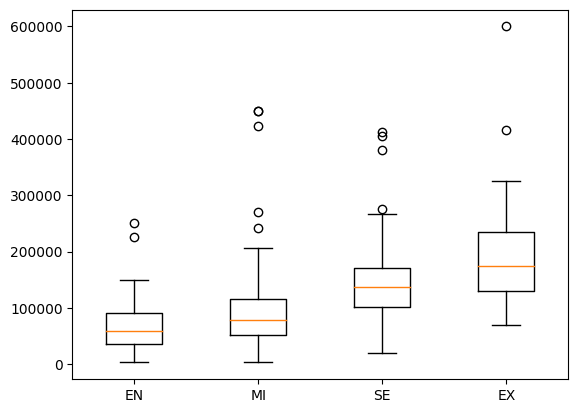

In [ ]:
plt.boxplot([chart[chart['experience_level'] == 'EN']['salary_in_usd'],
             chart[chart['experience_level'] == 'MI']['salary_in_usd'],
             chart[chart['experience_level'] == 'SE']['salary_in_usd'],
             chart[chart['experience_level'] == 'EX']['salary_in_usd']],
            labels=['EN', 'MI', 'SE', 'EX'])
plt.show()

#**Effect of Experience on Salary:**

It is clear that the EX level receives a significantly higher pay rate in comparison to the EN level. However when the average is compared to the MI and SE levels the SE middle range is within the middle to lower range of the EX indicating that more experience doesn't always indicate higher pay. The EX level does however have the higher outlier meaning that the higher paid data scientist would have EX experience. The EN level has the most consistent pay rate compared to the other levels with very little fluctuation and outliers.


In [ ]:
for exp_level in ['EN', 'MI', 'SE', 'EX']:
    salaries = chart[chart['experience_level'] == exp_level]['salary_in_usd']
    print(f"Experience Level: {exp_level}")
    print(f"Five-Number Summary: {salaries.describe()}")
    print(f"Mean: {salaries.mean()}")
    print(f"Median: {salaries.median()}")
    print(f"Standard Deviation: {salaries.std()}")
    print("-" * 20)

Experience Level: EN
Five-Number Summary: count        80.000000
mean      65249.812500
std       44934.400602
min        4000.000000
25%       35451.000000
50%       59551.000000
75%       90000.000000
max      250000.000000
Name: salary_in_usd, dtype: float64
Mean: 65249.8125
Median: 59551.0
Standard Deviation: 44934.40060238975
--------------------
Experience Level: MI
Five-Number Summary: count       201.000000
mean      91077.527363
std       64348.005809
min        2859.000000
25%       51519.000000
50%       78526.000000
75%      115000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64
Mean: 91077.52736318408
Median: 78526.0
Standard Deviation: 64348.00580911966
--------------------
Experience Level: SE
Five-Number Summary: count       275.000000
mean     140119.658182
std       57025.093567
min       18907.000000
25%      101185.000000
50%      136620.000000
75%      170000.000000
max      412000.000000
Name: salary_in_usd, dtype: float64
Mean: 140119.6581818181

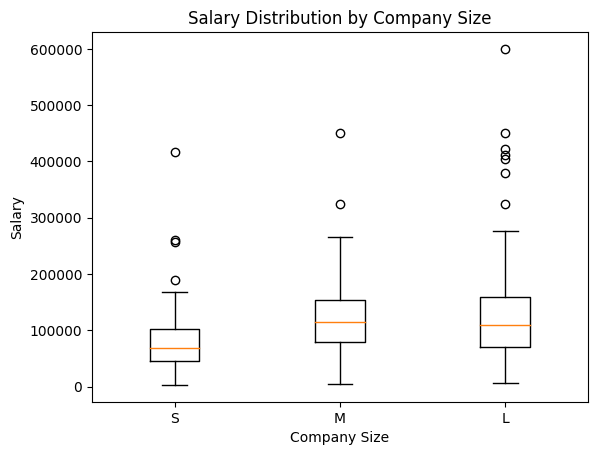

In [ ]:
plt.boxplot([chart[chart['company_size'] == 'S']['salary_in_usd'],
             chart[chart['company_size'] == 'M']['salary_in_usd'],
             chart[chart['company_size'] == 'L']['salary_in_usd']],
            labels=['S', 'M', 'L'])
plt.xlabel("Company Size")
plt.ylabel("Salary")
plt.title("Salary Distribution by Company Size")
plt.show()

#**Effect of Company Size on Salary:**

The box plot shows that data scientists have higher salaries on average in middle to large size commpanies compared to smaller companies. The data shows that the larger the company is, the higher the mean, median and highest possible salary achievable is. Based on the data, a small company has an average salary of 79817.83, a median company on average pays 118350, and for a large company the average is 126090.01. In a large company especially, there are more outliers who make a significant amount of money, max being 600000, compared to Mid and smaller sized companies whose max is 416000, and 450000 respectively.

In [ ]:
for exp_level in ['S', 'M', 'L']:
    salaries = chart[chart['company_size'] == exp_level]['salary_in_usd']
    print(f"Experience Level: {exp_level}")
    print(f"Five-Number Summary: {salaries.describe()}")
    print(f"Mean: {salaries.mean()}")
    print(f"Median: {salaries.median()}")
    print(f"Standard Deviation: {salaries.std()}")
    print("-" * 20)

Experience Level: S
Five-Number Summary: count        78.000000
mean      79817.833333
std       64581.554758
min        2859.000000
25%       45653.500000
50%       67881.500000
75%      102370.000000
max      416000.000000
Name: salary_in_usd, dtype: float64
Mean: 79817.83333333333
Median: 67881.5
Standard Deviation: 64581.55475808756
--------------------
Experience Level: M
Five-Number Summary: count       321.000000
mean     118350.323988
std       58590.477351
min        4000.000000
25%       78526.000000
50%      115000.000000
75%      154000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64
Mean: 118350.32398753894
Median: 115000.0
Standard Deviation: 58590.477350534136
--------------------
Experience Level: L
Five-Number Summary: count       182.000000
mean     126090.016484
std       86348.230843
min        5882.000000
25%       69999.250000
50%      109500.000000
75%      160000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64
Mean: 126090.016

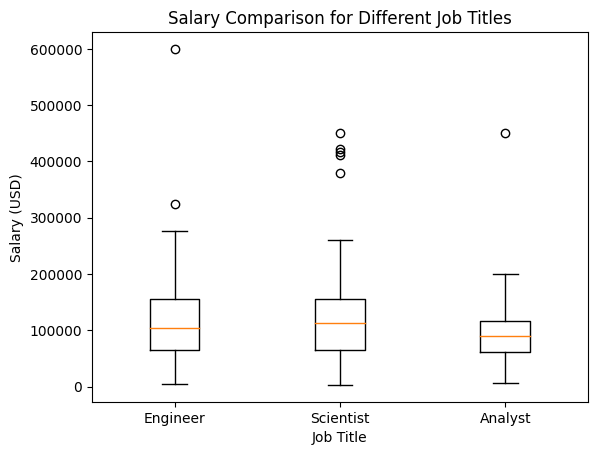

In [ ]:
# Create a list to store salaries for each job category
salaries = []

# Extract salaries for each job category
for job_type in ['Engineer', 'Scientist', 'Analyst']:
  salaries.append(chart[chart['job_title'].str.contains(job_type, case=False)]['salary_in_usd'])

# Create the box plot
plt.boxplot(salaries, labels=['Engineer', 'Scientist', 'Analyst'])
plt.xlabel("Job Title")
plt.ylabel("Salary (USD)")
plt.title("Salary Comparison for Different Job Titles")
plt.show()

#**Job Title Analysis:**
It is made clear by the box-plot that key indicators in job title such as Engineer, Scientist, and Analyst have the smallest relationship witht the salary. The Engineer title clearly represents the group with the highest average pay but only by small margins. The Engineer title also has the higher outlier indicating that the highest paid data workers will be engineers. The scientist category has a group of outliers indicating that while average salary is very similar to the Engineer title there is a small group of Scientists consitantly paid more than the rest. Anaylsts have the smallest spread and average indicating that they recieve the most consistantly lower salaries.


In [ ]:
import pandas as pd

# Create a pivot table and find mean of salary
grouped_data = chart.groupby(['job_title', 'company_size'])['salary'].mean().reset_index()

pivot_table = pd.pivot_table(grouped_data, values='salary', index='job_title', columns='company_size')

# Print the pivot table
print(pivot_table.round(1))


company_size                                     L         M         S
job_title                                                             
3D Computer Vision Researcher                  NaN  400000.0       NaN
AI Scientist                              127500.0   66000.0  156000.0
Analytics Engineer                             NaN  175000.0       NaN
Applied Data Scientist                    172400.0       NaN       NaN
Applied Machine Learning Scientist        249000.0   33700.0       NaN
BI Data Analyst                           150000.0   99000.0   32136.0
Big Data Architect                             NaN  125000.0       NaN
Big Data Engineer                         252500.0   72500.0   59000.0
Business Data Analyst                      93750.0       NaN       NaN
Cloud Data Engineer                       120000.0       NaN  160000.0
Computer Vision Engineer                       NaN   65250.0  120000.0
Computer Vision Software Engineer              NaN   70000.0  115500.0
Data A

#**Conclusion:**
Overall it is clear that there are many relationships that can impact salary. This includes experience, company, job title, and others. It is not necessarily clear in the data whether or not the title truly impacts the pay rate or if it is just indicative of a lower paying field. Experience and Company size both have large impacts on salary.

Mean salary between all types of data scientists is around 115,601. In this field, it seems like the more experienced you are, the more money you will make. In larger companies, the mean salary is around 126,090 compared to smaller companies whose average salary is 118,350. In terms of salary comparison with different job titles, engineers and scientists make more money in general than analysts, but the outliers for salary in mean are more extreme compared to both scientists and analysts.